# Driver Drowsiness detection using CNN by Bharathraj S

# Modules

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from PIL import Image, ImageDraw
from playsound import playsound
import matplotlib.pyplot as plt
from tensorflow import keras
import face_recognition
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import cv2
import os

In [8]:
# Changing working directory
os.chdir('D:/amrita/sem 3/Math/M END SEM')

# PARAMETERS

In [38]:
batch_size_val = 80  # how many to process together
epochs_val = 100
noOfClasses=2
imageDimesions = (80, 80,3) 
testRatio = 0.2  # if 1000 images split will 200 for testing
validationRatio = 0.2  # if 1000 images 20% of remaining 800 will be 160 for validation

# EYE Cropping from full face images

# FOR OPEN EYES

In [12]:
# Image stored directory(where both the full and cropped images(folders) are present):-
image_stored_directory=r'D:\..\IMAGES'     

# Full sized image directory:-
im_dir=r'D:\..\IMAGES\F_OPENED'    

# Folder to save cropped images
save_img_dir=r'D:\..\IMAGES\CROPPED\OPEN' 
    

os.chdir(image_stored_directory)
paths = [] # all images
count=0
for r, d, f in os.walk(im_dir):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    # Using Facial Recognition Library on Image
    image = face_recognition.load_image_file(path)
    # create a variable for the facial feature coordinates
    face_landmarks_list = face_recognition.face_landmarks(image)

    # create a placeholder list for the eye coordinates
    eyes = []
    try:
        eyes.append(face_landmarks_list[0]['left_eye'])
        eyes.append(face_landmarks_list[0]['right_eye'])
    except:
        continue
    # establish the max x and y coordinates of the eye
    for eye in eyes:
        x_max = max([coordinate[0] for coordinate in eye])
        x_min = min([coordinate[0] for coordinate in eye])
        y_max = max([coordinate[1] for coordinate in eye])
        y_min = min([coordinate[1] for coordinate in eye])
      # establish the range of x and y coordinates    
        x_range = x_max - x_min
        y_range = y_max - y_min

        # to make sure the full eye is captured,
        # calculate the coordinates of a square that has 50%
        # cushion added to the axis with a larger range
        if x_range > y_range:
            right = round(.5*x_range) + x_max
            left = x_min - round(.5*x_range)
            bottom = round(((right-left) - y_range))/2 + y_max
            top = y_min - round(((right-left) - y_range))/2
        else:
            bottom = round(.5*y_range) + y_max
            top = y_min - round(.5*y_range)
            right = round(((bottom-top) - x_range))/2 + x_max
            left = x_min - round(((bottom-top) - x_range))/2

        #crop original image using the cushioned coordinates
        im = Image.open(path)
        im = im.crop((left, top, right, bottom))

        # resize image for input into our model
        im = im.resize((80,80))

        os.chdir(save_img_dir)
        # save file to output folder
        im.save(str(count)+'.jpg')

        # increase count for iterative file saving
        count += 1
        # print count every 200 photos to monitor progress
        if count % 200 == 0:
            print("Successfully saved "+ str(count)+" images") 
open_img = save_img_dir
print("Total number of cropped images:",(count))


Successfully saved 200 images
Successfully saved 400 images
Successfully saved 600 images
Successfully saved 800 images
Successfully saved 1000 images
Successfully saved 1200 images
Successfully saved 1400 images
Successfully saved 1600 images
Successfully saved 1800 images
Successfully saved 2000 images
Successfully saved 2200 images
Total number of cropped images: 2380


# FOR CLOSED EYES

In [16]:
# Image stored directory(where both the full and cropped images are present):-
image_stored_directory = r'D:\..\IMAGES'    

# Full sized image directory:-
im_dir = r'D:\..\IMAGES\F_CLOSED' 

# Folder to save cropped images:-
save_img_dir = r'D:\..\IMAGES\CROPPED\CLOSE'

os.chdir(image_stored_directory)
paths = [] # all images
count=0
for r, d, f in os.walk(im_dir):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
      
    image = face_recognition.load_image_file(path)
    # create a variable for the facial feature coordinates
    face_landmarks_list = face_recognition.face_landmarks(image)

    # create a placeholder list for the eye coordinates
    eyes = []
    try:
        eyes.append(face_landmarks_list[0]['left_eye'])
        eyes.append(face_landmarks_list[0]['right_eye'])
    except:
        continue
    # establish the max x and y coordinates of the eye
    for eye in eyes:
        x_max = max([coordinate[0] for coordinate in eye])
        x_min = min([coordinate[0] for coordinate in eye])
        y_max = max([coordinate[1] for coordinate in eye])
        y_min = min([coordinate[1] for coordinate in eye])
      # establish the range of x and y coordinates    
        x_range = x_max - x_min
        y_range = y_max - y_min

        # to make sure the full eye is captured,
        # calculate the coordinates of a square that has 50%
        # cushion added to the axis with a larger range
        if x_range > y_range:
            right = round(.5*x_range) + x_max
            left = x_min - round(.5*x_range)
            bottom = round(((right-left) - y_range))/2 + y_max
            top = y_min - round(((right-left) - y_range))/2
        else:
            bottom = round(.5*y_range) + y_max
            top = y_min - round(.5*y_range)
            right = round(((bottom-top) - x_range))/2 + x_max
            left = x_min - round(((bottom-top) - x_range))/2

        #crop original image using the cushioned coordinates
        im = Image.open(path)
        im = im.crop((left, top, right, bottom))

        # resize image for input into our model
        im = im.resize((80,80))
        os.chdir(save_img_dir)
        # save file to output folder
        im.save(str(count)+'.jpg')

        # increase count for iterative file saving
        count += 1
        # print count every 200 photos to monitor progress
        if (count) % 200 == 0:
            print("successfully saved "+ str(count)+" images")
            
print("Total number of cropped images:",(count))    
close_img = save_img_dir

successfully saved 200 images
successfully saved 400 images
successfully saved 600 images
successfully saved 800 images
successfully saved 1000 images
successfully saved 1200 images
successfully saved 1400 images
successfully saved 1600 images
successfully saved 1800 images
successfully saved 2000 images
Total number of cropped images: 2002


# LOADING CROPPED IMAGES

In [11]:
# FUNCTION FOR LOADING IMAGES
def load_images_from_folder(folder, eyes = 0):
    count = 0
    error_count = 0
    images = []
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.resize(img, (80,80)) ## Resizing the images
            ## for eyes if it is 0: open, 1: close
            images.append([img, eyes])
        except:
            error_count += 1
            print('ErrorCount = ' + str(error_count))
            continue
        
        count += 1
        if count % 1000 == 0:
            print('Succesful Image Import Count = ' + str(count))

    return images



# Open eyes 

In [18]:
open_img = r'D:\..\IMAGES\CROPPED\OPEN' # Location of directory images already cropped

folder = open_img

open_eyes = load_images_from_folder(folder, 0)

Succesful Image Import Count = 1000
Succesful Image Import Count = 2000


# Close eyes

In [19]:
close_img = r'D:\..\IMAGES\CROPPED\CLOSE' # Location of directory images already cropped
folder = close_img
closed_eyes = load_images_from_folder(folder, 1)


Succesful Image Import Count = 1000
Succesful Image Import Count = 2000


In [20]:
eyes = closed_eyes + open_eyes

In [21]:
X = [] # IMAGES
y = [] # LABELS
for features, label in eyes: 
    X.append(features)
    y.append(label)
    
# NUMPY ARRAY CONVERTION
images=np.array(X)    
labels=np.array(y)

print("Total Images",len(X))    

Total Images 4382


# DATA SPLITTING

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=testRatio)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [23]:
# TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET

print("Data Shapes")
print("Train", end="")
print(X_train.shape, y_train.shape)
print("Validation", end="")
print(X_validation.shape, y_validation.shape)
print("Test", end="")
print(X_test.shape, y_test.shape)
assert (X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert (X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert (X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert (X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert (X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert (X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"


Data Shapes
Train(2804, 80, 80, 3) (2804,)
Validation(701, 80, 80, 3) (701,)
Test(877, 80, 80, 3) (877,)


# DATA AUGMENTATION 

In [24]:
print("X_train shape before gray",X_train.shape)

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)  # CONVERT TO GRAYSCALE
    img = equalize(img)  # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img / 255  # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img


X_train = np.array(list(map(preprocessing, X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))
print("X_train shape after gray",X_train.shape)


# ADDING A DEPTH OF 1 (grayscale)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print("X_train shape after depth",X_train.shape)


# AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range=0.1,
                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10)  # DEGREES

dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch, y_batch = next(batches)


#One hot encoding
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

X_train shape before gray (2804, 80, 80, 3)
X_train shape after gray (2804, 80, 80)
X_train shape after depth (2804, 80, 80, 1)


# MODEL

In [39]:
def my_Model():   
    
    # Instantiate the model
    model = Sequential()

    # Adding first three convolutional layers
    model.add(Conv2D(
                    filters = 32, d(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation =ivation function 
                    input_shape = (imageDimesions[0],imageDimesions[1],1) # shape of input (image)
                    ))
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    
    # Adding pooling after convolutional layers
    model.add(MaxPooling2D(pool_size = (2,2))) # Dimensions of the region that you are pooling

    # Adding second set of convolutional layers
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    
    # Add last pooling layer.
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    # Adding first dense layer with 256 nodes
    model.add(Dense(256, activation='relu'))

    # Adding a dropout layer to avoid overfitting
    model.add(pout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3)) 

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # adding output layer
    model.add(Dense(2, activation = 'sigmoid'))

    # compiling the model
    model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# TRAINING

In [40]:
model = my_Model()
print(model.summary())
# FITTING
history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val),steps_per_epoch= len(X_train)//batch_size_val, epochs=epochs_val,validation_data=(X_validation, y_validation), shuffle=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 78, 78, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 76, 76, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 35, 35, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)       

35/35 [==============================] - 18s 517ms/step - loss: 0.1102 - accuracy: 0.9637 - val_loss: 0.1803 - val_accuracy: 0.9401
Epoch 98/100
35/35 [==============================] - 18s 518ms/step - loss: 0.1534 - accuracy: 0.9442 - val_loss: 0.1250 - val_accuracy: 0.9544
Epoch 99/100
35/35 [==============================] - 18s 523ms/step - loss: 0.0874 - accuracy: 0.9684 - val_loss: 0.1391 - val_accuracy: 0.9529
Epoch 100/100
35/35 [==============================] - 18s 526ms/step - loss: 0.0655 - accuracy: 0.9747 - val_loss: 0.1423 - val_accuracy: 0.9572


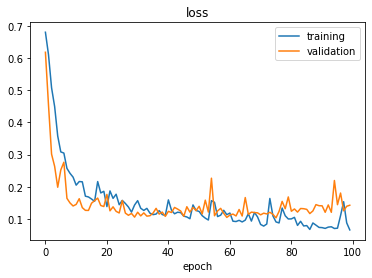

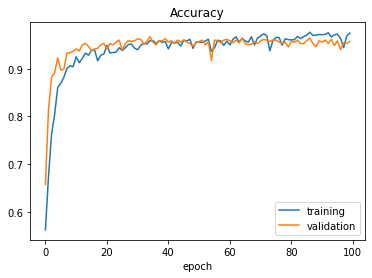

In [45]:
# PLOT
plt.figure(0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')


plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()


In [42]:
score = model.evaluate(X_test, y_test, verbose=1)

print('Test Score:', score[0])
print('Test Accuracy:', score[1])

28/28 [==============================] - 1s 34ms/step - loss: 0.1473 - accuracy: 0.9510
Test Score: 0.14728029072284698
Test Accuracy: 0.9509692192077637


# SAVING MODEL

In [43]:
# Directory to save
os.chdir('D:/..')

In [44]:
model.save('modelnicename.h5')

# TESTING

In [28]:
import cv2
import numpy as np
import os
from playsound import playsound
from PIL import Image, ImageDraw
import face_recognition
from tensorflow import keras

In [29]:
# Directory where the model is saved
os.chdir('D:/..')

In [30]:
# Importing Saved Model
eye_model = keras.models.load_model('modelnicename.h5')

In [31]:
# Data Preprocessing Function
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)  # CONVERT TO GRAYSCALE
    img = equalize(img)  # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img / 255  # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

# webcam frame is inputted into function
def eye_cropper(frame):
    
        
    # create a variable for the facial feature coordinates
    facial_features_list = face_recognition.face_landmarks(frame)

    # create a placeholder list for the eye coordinates
    # and append coordinates for eyes to list unless eyes
    # weren't found by facial recognition
    try:
        eye = facial_features_list[0]['left_eye']
    except:
        try:
            eye = facial_features_list[0]['right_eye']
        except:
            return
    
    # establish the max x and y coordinates of the eye
    x_max = max([coordinate[0] for coordinate in eye])
    x_min = min([coordinate[0] for coordinate in eye])
    y_max = max([coordinate[1] for coordinate in eye])
    y_min = min([coordinate[1] for coordinate in eye])

    # establish the range of x and y coordinates
    x_range = x_max - x_min
    y_range = y_max - y_min

    # in order to make sure the full eye is captured,
    # calculate the coordinates of a square that has a
    # 50% cushion added to the axis with a larger range and
    # then match the smaller range to the cushioned larger range
    if x_range > y_range:
        right = round(.5*x_range) + x_max
        left = x_min - round(.5*x_range)
        bottom = round((((right-left) - y_range))/2) + y_max
        top = y_min - round((((right-left) - y_range))/2)
    else:
        bottom = round(.5*y_range) + y_max
        top = y_min - round(.5*y_range)
        right = round((((bottom-top) - x_range))/2) + x_max
        left = x_min - round((((bottom-top) - x_range))/2)

    # crop the image according to the coordinates determined above
    cropped = frame[top:(bottom + 1), left:(right + 1)]

    # resize the image
    image_for_prediction = cv2.resize(cropped, (80,80))
    

    return image_for_prediction


# initiate webcam
cap = cv2.VideoCapture(0)
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# set a counter
counter = 0

# create a while loop that runs while webcam is in use
while True:

    # capture frames being outputted by webcam
    ret, frame = cap.read()
    # use only every other frame to manage speed and memory usage
    frame_count = 0
    if frame_count == 0:
        frame_count += 1
        pass
    else:
        count = 0
        continue

    try:
        # function called on the frame
        image_for_prediction = eye_cropper(frame)

        # Image Preprocessing
        image_for_prediction=preprocessing(image_for_prediction)
        image_for_prediction = image_for_prediction.reshape(-1, 80, 80, 1)

        # get prediction from model

        prediction = eye_model.predict(image_for_prediction)
        print(prediction)
    except:
        continue
    
    # Based on prediction, display either "Open Eyes" or "Closed Eyes"
    if  np.argmax(prediction) < 0.5:
        counter = 0
        status = 'Open'

        cv2.rectangle(frame, (round(w/2) - 110,20), (round(w/2) + 110, 80), (38,38,38), -1)

        cv2.putText(frame, status, (round(w/2)-80,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 2, cv2.LINE_4)
        x1, y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1-20, y1+h1-20), (0,0,0), -1)
        ## Add text
        cv2.putText(frame, 'Active', (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255,0),2)
    else:
        counter = counter + 1
        status = 'Closed'

        cv2.rectangle(frame, (round(w/2) - 110,20), (round(w/2) + 110, 80), (38,38,38), -1)

        cv2.putText(frame, status, (round(w/2)-104,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2, cv2.LINE_4)
        x1, y1,w1,h1 = 0,0,175,75
        ## Draw black background rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1-20, y1+h1-20), (0,0,0), -1)
        ## Add text
        cv2.putText(frame, 'Active', (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255,0),2)

        # if the counter is greater than 3, play and show alert that user is asleep
        if counter > 2:

            ## Draw black background rectangle
            cv2.rectangle(frame, (round(w/2) - 160, round(h) - 200), (round(w/2) + 160, round(h) - 120), (0,0,255), -1)
            cv2.putText(frame, 'DRIVER SLEEPING', (round(w/2)-136,round(h) - 146), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_4)
            cv2.imshow('Drowsiness Detection', frame)
            k = cv2.waitKey(1)
            ## Sound
            playsound("rooster.mp3")
            counter = 1
            continue
    
    cv2.imshow('Drowsiness Detection', frame)
    k = cv2.waitKey(1)
    if k == ord(' '): # PRESS SPACEBAR TO EXIT THE WINDOW(PREDICTION)
        break
cap.release()
cv2.destroyAllWindows()

[[1.0000000e+00 3.0689334e-06]]
[[1.00000e+00 6.90567e-07]]
[[6.3726958e-04 9.9999905e-01]]
[[9.9999714e-01 1.8009581e-04]]
[[1.0000000e+00 4.3139903e-06]]
[[1.0000000e+00 1.4630343e-05]]
[[1.00000000e+00 1.08795035e-07]]
[[1.0000000e+00 1.6345828e-07]]
[[1.000000e+00 8.032409e-06]]
[[9.9999976e-01 3.2490301e-05]]
[[9.9999762e-01 1.6023872e-04]]
[[9.9999976e-01 5.0554387e-05]]
[[1.0000000e+00 5.2415485e-06]]
[[0.99883837 0.0100383 ]]
[[1.000000e+00 1.421577e-07]]
[[1.0000000e+00 2.9962237e-08]]
[[1.000000e+00 8.127542e-08]]
[[1.000000e+00 2.121643e-09]]
[[1.000000e+00 1.309525e-08]]
[[1.0000000e+00 3.9526947e-07]]
[[1.000000e+00 3.144452e-07]]
[[1.0000000e+00 3.3646077e-09]]
[[1.000000e+00 3.668866e-08]]
[[1.0000000e+00 6.7241257e-07]]
[[1.0000000e+00 2.3840015e-07]]
[[1.000000e+00 3.035254e-06]]
[[1.0000000e+00 1.5007123e-06]]
[[1.0000000e+00 2.0978473e-07]]
[[1.0000000e+00 2.1721222e-07]]
[[9.9999976e-01 3.2157561e-05]]
[[0.00353215 0.99988747]]
[[9.9999857e-01 9.8939723e-05]]
[[1.00